# NCAE on Fashion-MNIST Dataset
Deep Learning of Part-based Representation of Data Using Sparse Autoencoders with Nonnegativity Constraints from Hosseini-Asl et al. (2016).
* Dimension of the encoding : 100
* Shallow Encoder and Decoder with non-tied weights and sigmoid activations 
* Sparsity of the encoding enforced with deviation of expected activation of hidden units from expected objective, using the KL divergence as deviation measure:
    * Sparsity objective : p = 0.05
    * Weight of the regularization term : beta = 3
* Non-Negativity of the weigths enforced with asymetric weight decay (no decay on positive weights):
    * Weight of the decay: lambda = 0.003

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import datetime
import morphoMaths
import pandas as pd
from scipy import io
import metrics
import atoms_analysis

Using TensorFlow backend.


In [2]:
FILE_PATH = "../"
x_train, _, x_test, _ = bastien_utils.load_data_fashionMNIST(FILE_PATH, train=True, test=True, subsetTest=False)
idx_small = np.arange(10)
idx_small[2]=31
x_small = x_test[idx_small]
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [1]:
h_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/h_test.mat")['h_test']
x_rec_test = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/x_rec_test.mat")['x_rec_test']
atoms = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/W2.mat")['W2']
bias = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/b2.mat")['b2']

NameError: name 'io' is not defined

In [5]:
print("h_test.shape: ", h_test.shape)
print("x_rec_test.shape: ", x_rec_test.shape)
print("atoms.shape: ", atoms.shape)
print("bias.shape: ", bias.shape)

h_test.shape:  (100, 10000)
x_rec_test.shape:  (784, 10000)
atoms.shape:  (784, 100)
bias.shape:  (784, 1)


In [6]:
x_rec_test = np.transpose(x_rec_test).reshape((10000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))
h_test = np.transpose(h_test)
bias = bias.reshape((28,28,1))

In [ ]:
x_rec_small = x_rec_test[idx_small]

Original images and reconstructions - Reconstruction error:  0.016880039160470817


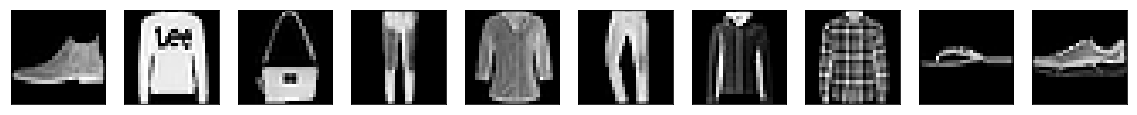

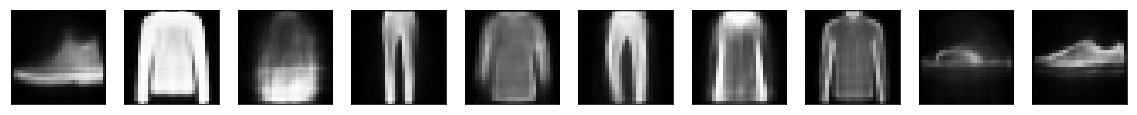

Histograms of the encodings - Sparsity (Hoyer):  0.5950848284278645


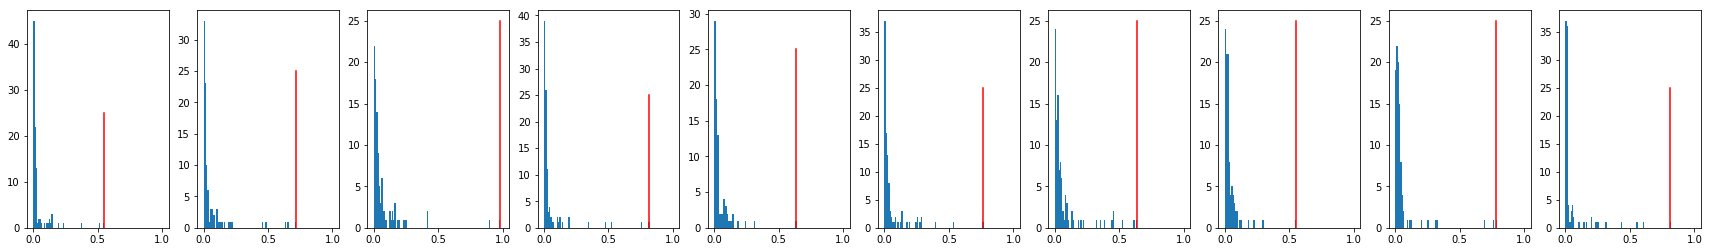

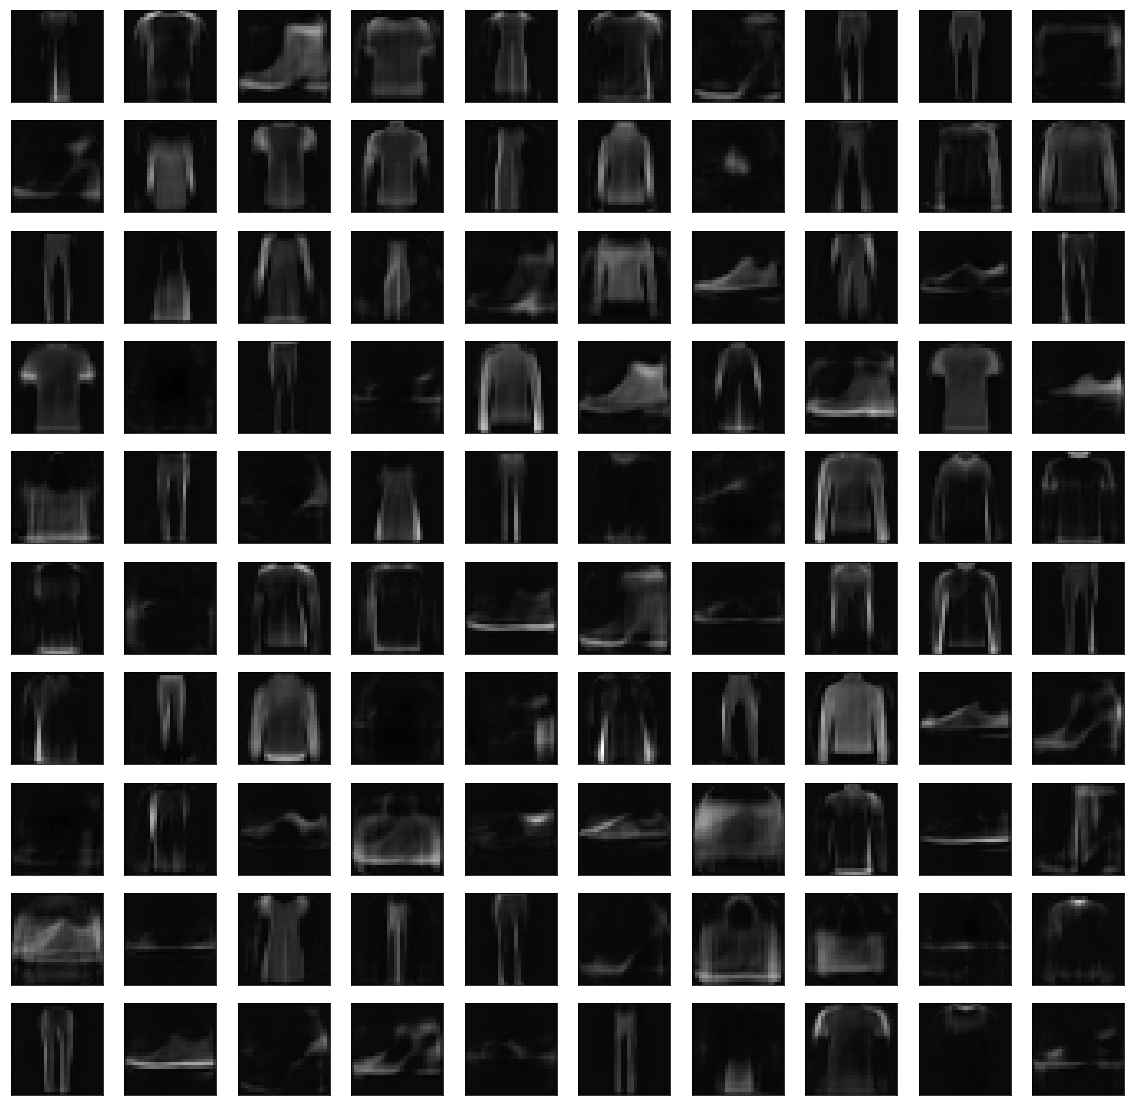

Atom images of the decoder


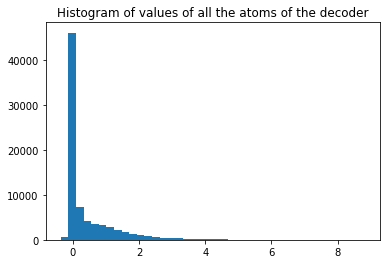

In [46]:
print('Original images and reconstructions - Reconstruction error: ', np.mean(np.square(x_test-x_rec_test)))
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_test))
metrics.plot_histograms_of_the_encoding(h_test[idx_small])
bastien_utils.plot_all_images(atoms)
print('Atom images of the decoder')
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of the original images


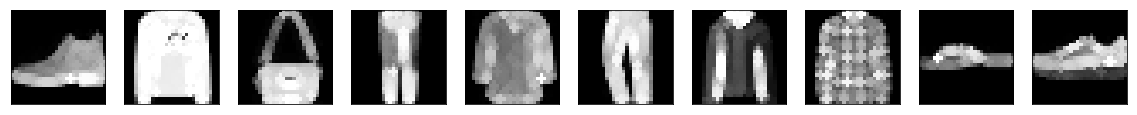

Dilatation of the reconstructions


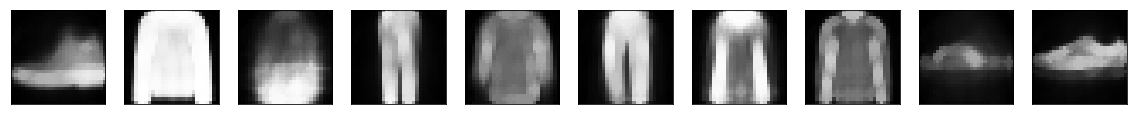

Original images and max-approximation to dilatation
Max-approx error to original:  0.030428671779004678  - Max-approx error to reconstruction:  0.02607320230418074


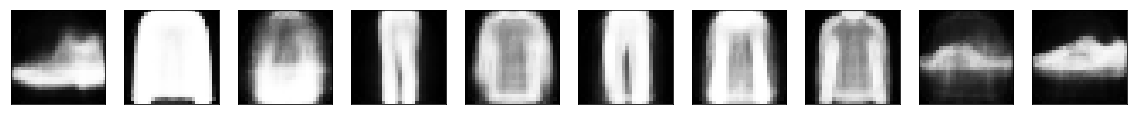

Dilated of the atom images of the decoder


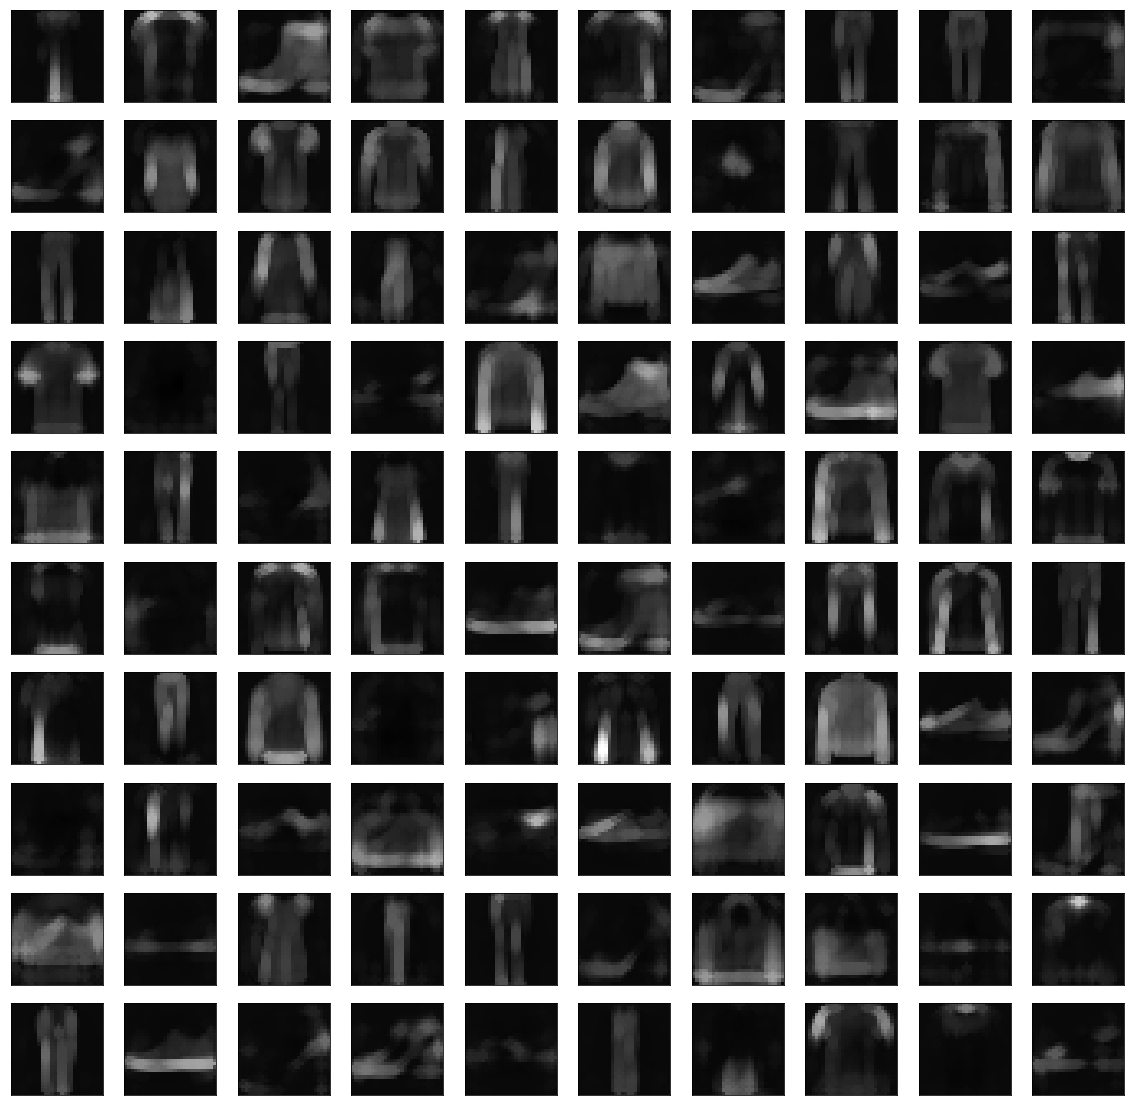

In [50]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx_x_test = sigmoid(np.dot(h_test, atoms_dil.reshape((100, 784))) + np.transpose(bias.reshape((784,1)))).reshape((10000, 28, 28, 1))
print('Original images and max-approximation to dilatation')
test_max_approx_to_Original = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)-max_approx_x_test))
test_max_approx_to_Rec = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_test, SE_scale=1)-max_approx_x_test))
print('Max-approx error to original: ', test_max_approx_to_Original, ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec)
bastien_utils.plot_all_images(max_approx_x_test[idx_small])
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil)

In [34]:
100*np.sum(atoms.flatten()<0)/len(atoms.flatten())

32.16836734693877

In [36]:
np.min(atoms)

-0.366660238959115

In [9]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms, h_test[:1000])

0.11080214753364234

In [11]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, h_test[:1000])

0.13235883403172433

In [16]:
del h_test
del h_test_2
del test_max_approx_to_Original
del test_max_approx_to_Rec
del x_rec_small
del x_rec_test
del x_test
del x_small

**Train set**

In [18]:
x_small = x_train[idx_small]

In [17]:
h_train = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/h_train.mat")['h_train']
x_rec_train = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/x_rec_train.mat")['x_rec_train']
atoms = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/W2.mat")['W2']
bias = io.loadmat("../Results/MNIST_Fashion/NCAE/sparsityParam_0.05_lambda_0.003_beta_3/b2.mat")['b2']

In [5]:
print("h_train.shape: ", h_train.shape)
print("x_rec_train.shape: ", x_rec_train.shape)
print("atoms.shape: ", atoms.shape)
print("bias.shape: ", bias.shape)

h_train.shape:  (100, 60000)
x_rec_train.shape:  (784, 60000)
atoms.shape:  (784, 100)
bias.shape:  (784, 1)


In [19]:
x_rec_train = np.transpose(x_rec_train).reshape((60000, 28, 28, 1))
atoms = np.transpose(atoms).reshape((100,28,28,1))
h_train = np.transpose(h_train)
bias = bias.reshape((28,28,1))

In [20]:
x_rec_small = x_rec_train[idx_small]

Original images and reconstructions - Reconstruction error:  0.01624870615519493


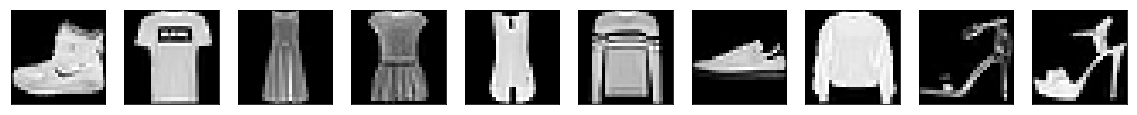

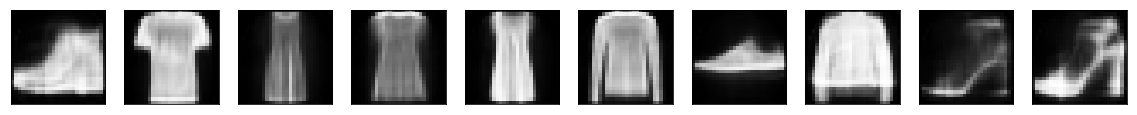

Histograms of the encodings - Sparsity (Hoyer):  0.5957906450394447


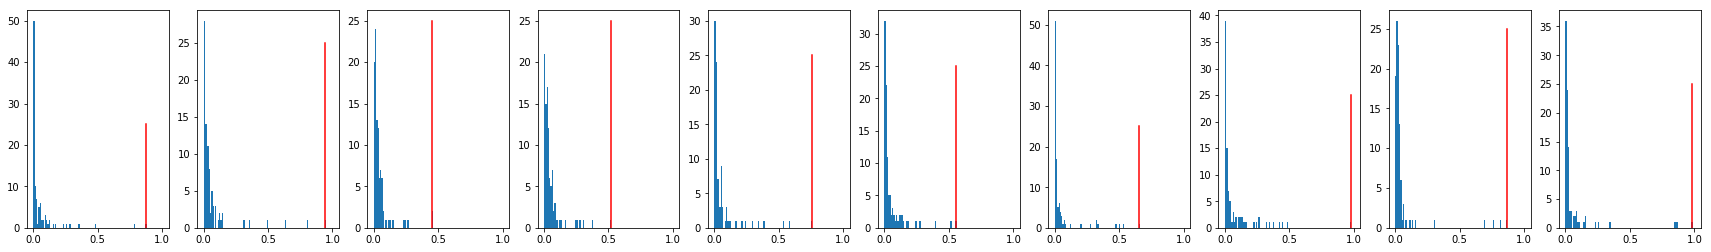

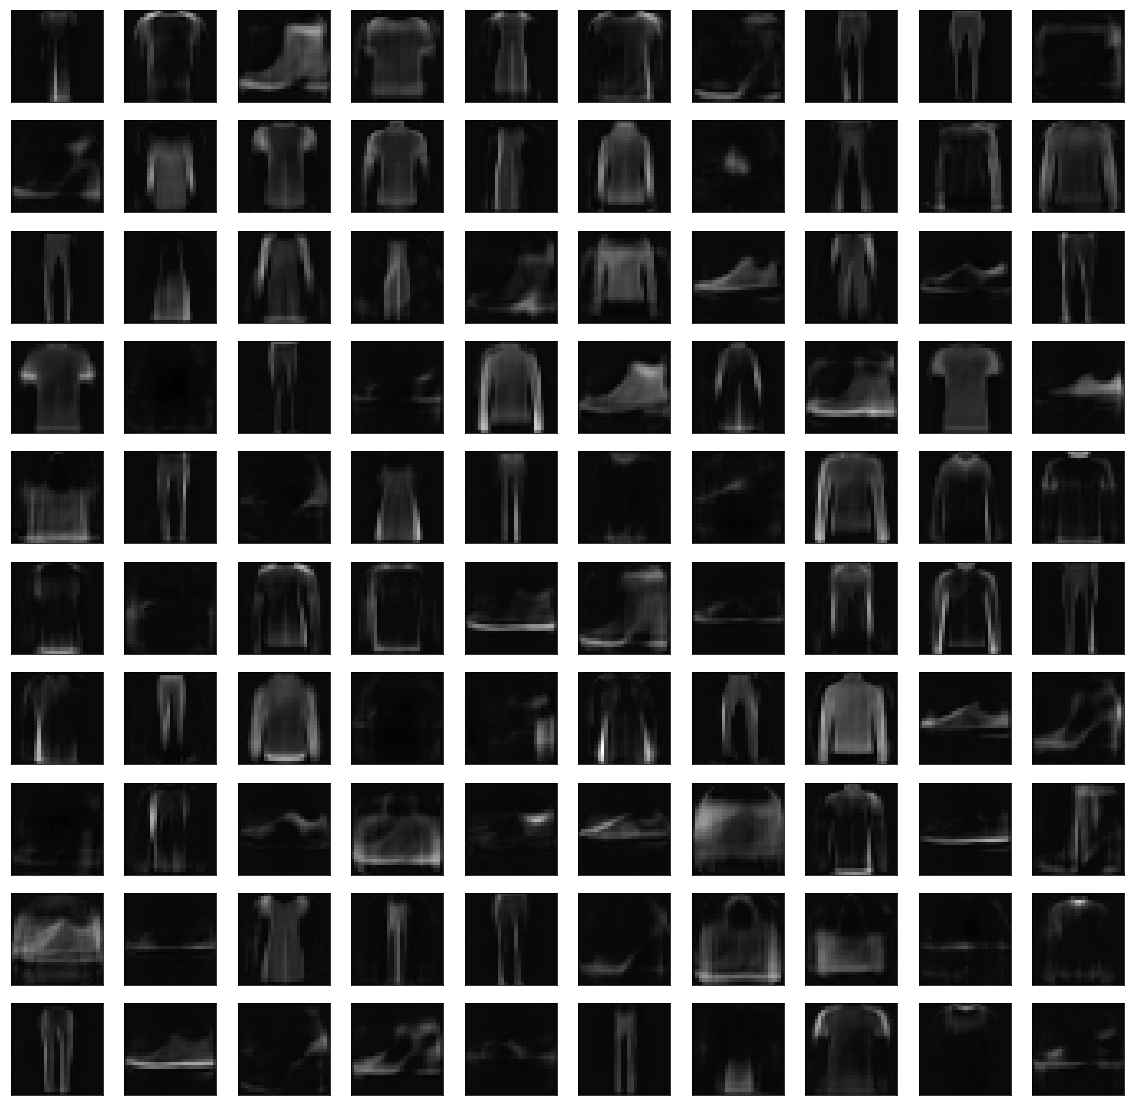

Atom images of the decoder


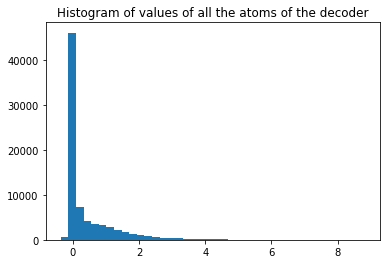

In [13]:
print('Original images and reconstructions - Reconstruction error: ', np.mean(np.square(x_train-x_rec_train)))
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_rec_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', metrics.sparsity_Hoyer(h_train))
metrics.plot_histograms_of_the_encoding(h_train[idx_small])
bastien_utils.plot_all_images(atoms)
print('Atom images of the decoder')
plt.hist(atoms.flatten(), bins=40)
plt.title('Histogram of values of all the atoms of the decoder')
plt.show()

Dilatation of the original images


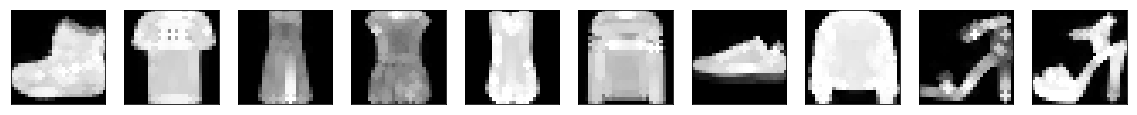

Dilatation of the reconstructions


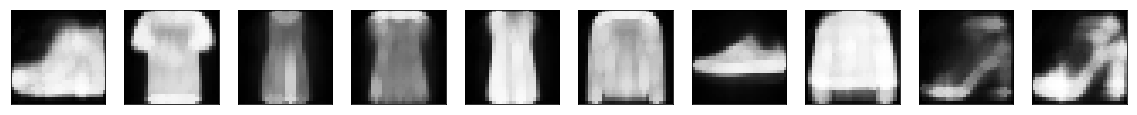

Original images and max-approximation to dilatation
Max-approx error to original:  0.0299787807268823  - Max-approx error to reconstruction:  0.025768189660328244


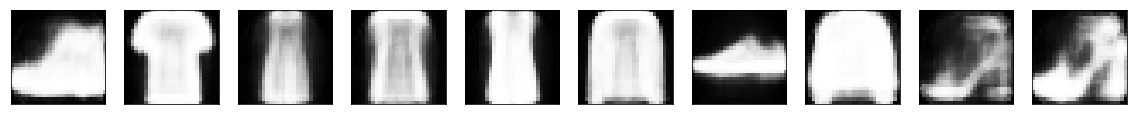

Dilated of the atom images of the decoder


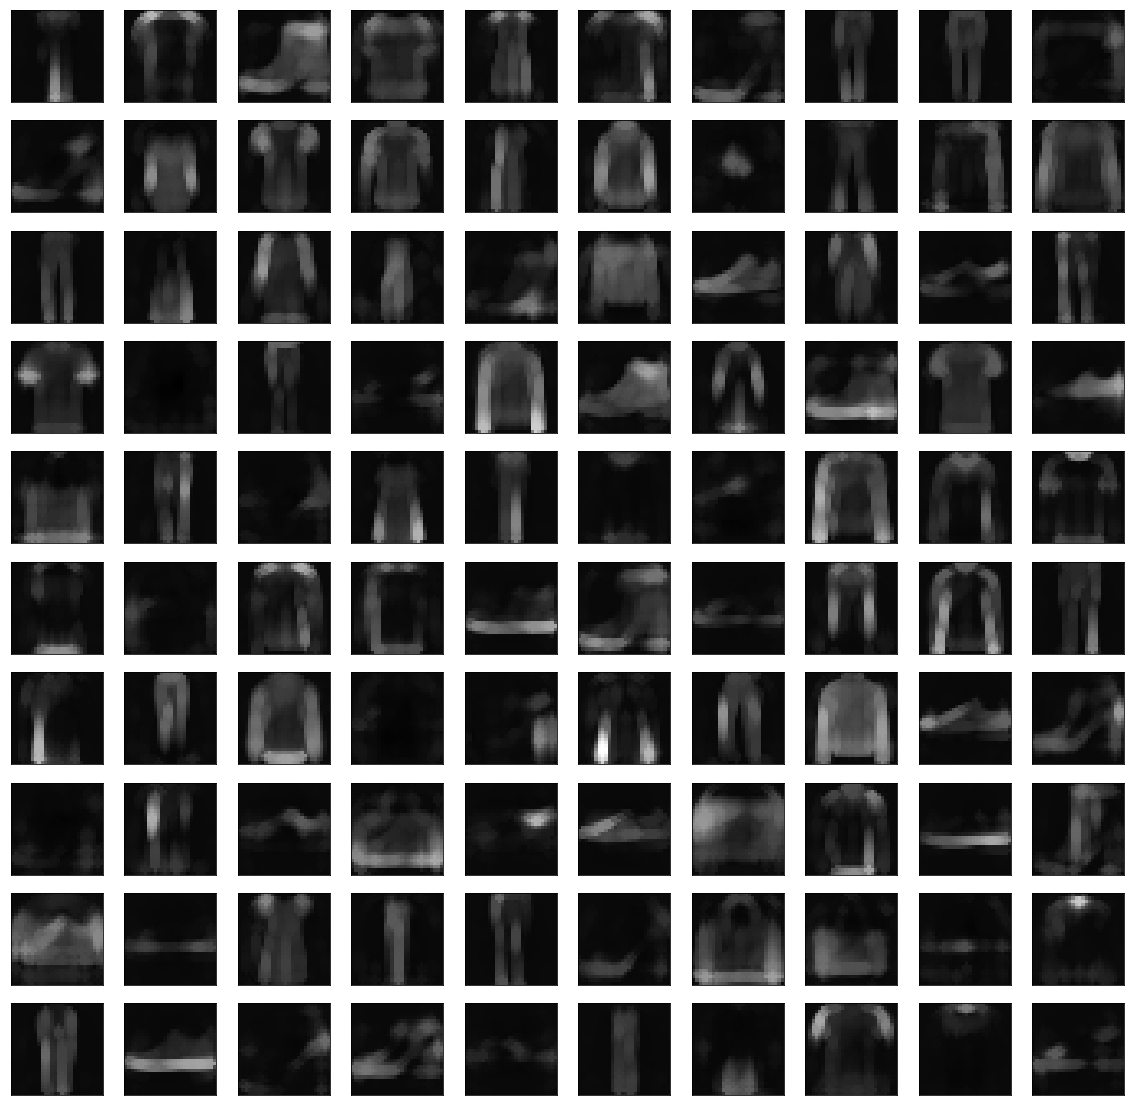

In [14]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_small, SE_scale=1))
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)
max_approx_x_train = sigmoid(np.dot(h_train, atoms_dil.reshape((100, 784))) + np.transpose(bias.reshape((784,1)))).reshape((60000, 28, 28, 1))
print('Original images and max-approximation to dilatation')
train_max_approx_to_Original = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_train, SE_scale=1)-max_approx_x_train))
train_max_approx_to_Rec = np.mean(np.square(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_rec_train, SE_scale=1)-max_approx_x_train))
print('Max-approx error to original: ', train_max_approx_to_Original, ' - Max-approx error to reconstruction: ', train_max_approx_to_Rec)
bastien_utils.plot_all_images(max_approx_x_train[idx_small])
print('Dilated of the atom images of the decoder')
bastien_utils.plot_all_images(atoms_dil)

In [21]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms, h_train[:1000])

0.11163531618129321

In [22]:
atoms_analysis.mean_gray_scale_jaccard_index_of_atoms_weighted_by_images_code(atoms_dil, h_train[:1000])

0.13332237037630326

**Atoms analysis**

In [15]:
import atoms_analysis

In [16]:
atoms_analysis.Hoyer_sparsity_of_atoms(atoms)

0.5068732168351167

In [17]:
atoms_analysis.Hoyer_sparsity_of_atoms(atoms_dil)

0.4284719194117764